In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv('../combined.csv')

df.columns = ["date", "qty"]
df['date'] = pd.to_datetime(df['date'])

df.sort_values('date', inplace=True)
df.head(10)

,date,qty
0,2018-01-01,257733
1,2018-01-04,577207
2,2018-01-05,1322201
3,2018-01-06,1652038
4,2018-01-07,1548883
5,2018-01-08,912316
6,2018-01-09,581753
7,2018-01-10,1172197
8,2018-01-12,263069
9,2018-01-14,443842


In [35]:
train = df[df['date'].dt.year < 2022]
test = df[df['date'].dt.year == 2022]

In [36]:
order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 12) 
model = SARIMAX(train['qty'], order=order, seasonal_order=seasonal_order)
sarima_model = model.fit()

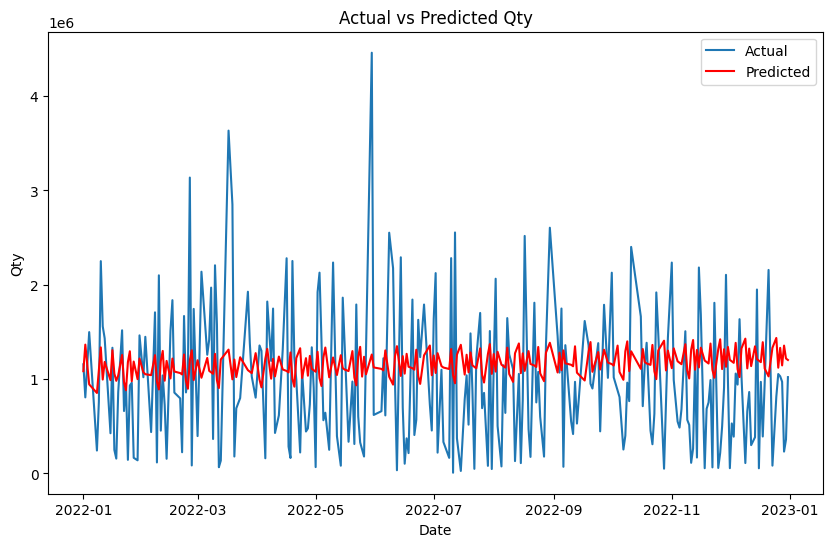

In [37]:

predicted = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(test['date'], test['qty'], label='Actual')
plt.plot(test['date'], predicted, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('Actual vs Predicted Qty')
plt.legend()
plt.show()

In [38]:
mse = mean_squared_error(test['qty'], predicted)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 599257003709.0824
Root Mean Squared Error (RMSE): 774116.9186299201


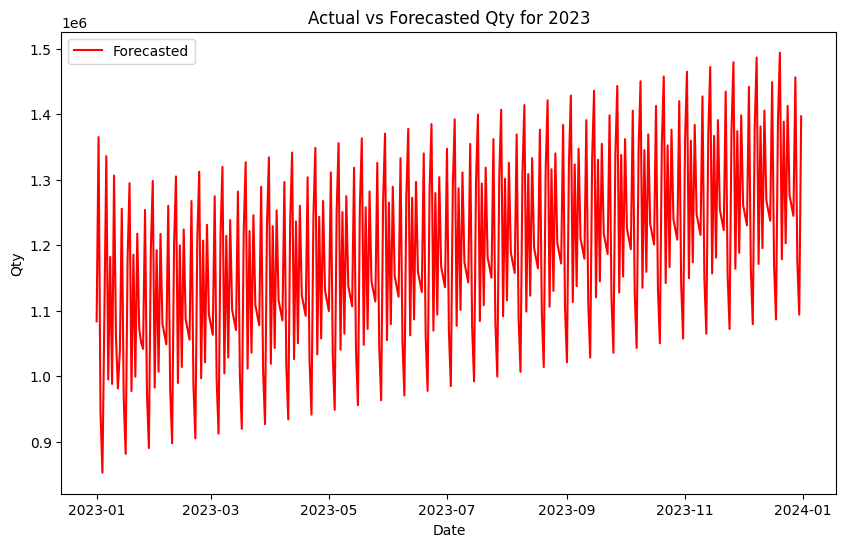

In [40]:
forecast_steps = 365  
forecast = sarima_model.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(start='2023-01-01', periods=forecast_steps)
forecast_df = pd.DataFrame({'date': forecast_dates, 'qty': forecast})

plt.figure(figsize=(10, 6))
plt.plot(forecast_df['date'], forecast_df['qty'], label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('Actual vs Forecasted Qty for 2023')
plt.legend()
plt.show()
